In [155]:
data = open('forth-coverage.dat', 'rb').read()
from struct import unpack
hits = unpack('65536I', data)
sorted(enumerate(hits), key=lambda xy: -xy[1])[:20]

[(7, 378479),
 (6, 324661),
 (20, 315266),
 (0, 290753),
 (21, 219716),
 (22, 180675),
 (1, 169493),
 (24, 166537),
 (25, 146531),
 (507, 136652),
 (2, 128083),
 (3, 75789),
 (37, 64759),
 (5393, 60288),
 (5394, 60288),
 (5395, 60288),
 (5396, 60288),
 (5397, 60288),
 (5398, 60288),
 (5399, 60288)]

In [156]:
hits[0xf001]

1225

In [157]:
hits[0xf0]

1

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns


In [159]:

import matplotlib.ticker as ticker

def hexaxes(step=16):
    axes = plt.gca()
    for ax in [axes.get_xaxis(), axes.get_yaxis()]:
        ax.set_major_locator(ticker.MultipleLocator(step))
        ax.set_major_formatter(ticker.FuncFormatter(lambda x, _: "0x%02x"%int(x)))


(256, 256) 378479 0


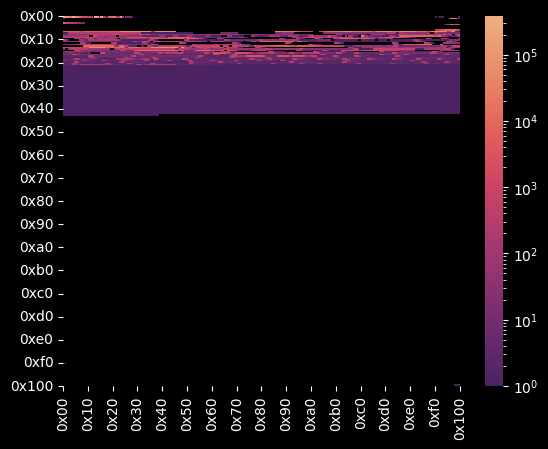

In [160]:
a = np.array(hits).reshape((256,256))
# a = a[16:92,:]
print(a.shape, a.max(), a.min())
sns.heatmap(a, cmap='flare_r', norm=LogNorm())

hexaxes()


Text(0.5, 1.0, 'Zero page')

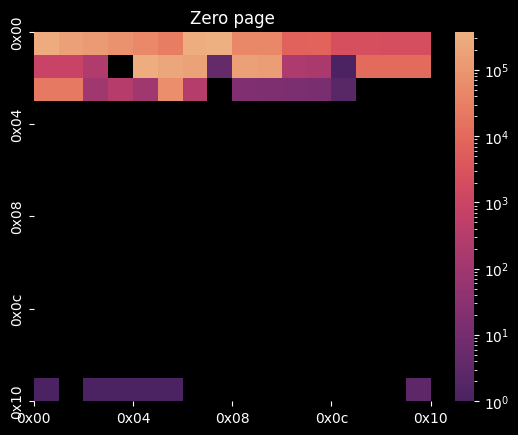

In [161]:
plt.style.use("dark_background")
a = np.array(hits[:256]).reshape((16,16))
sns.heatmap(a, cmap='flare_r', norm=LogNorm())
hexaxes(4)
plt.title('Zero page')

Text(0.5, 1.0, 'Page 1 (6502 stack)')

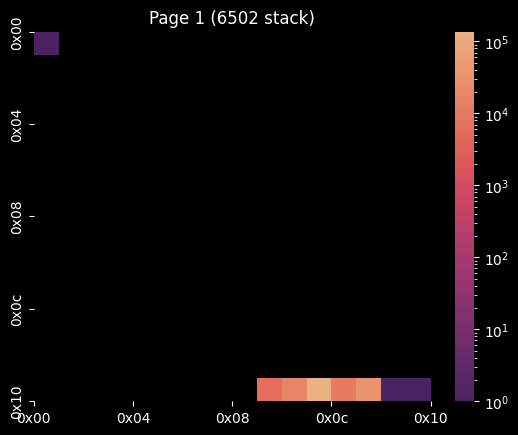

In [162]:
a = np.array(hits[0x100:0x200]).reshape((16,16))
sns.heatmap(a, cmap='flare_r', norm=LogNorm())
hexaxes(4)
plt.title('Page 1 (6502 stack)')

In [169]:
a = np.array(hits[0x200:0x400]).reshape((32,16))
print(a.min(), a.max())
if a.max() > 0:
    sns.heatmap(a, cmap='flare_r', norm=LogNorm())
    hexaxes(4)
    plt.title('Forth input buffer')
else:
    print("(empty)")


0 0
(empty)


Text(0.5, 1.0, 'Forth return stack + wordbuf')

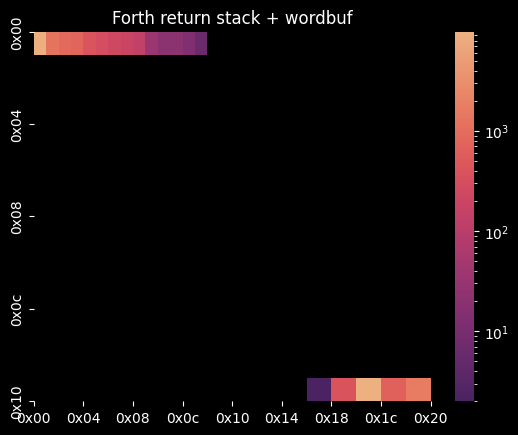

In [170]:
a = np.array(hits[0x400:0x600]).reshape((16,32))
sns.heatmap(a, cmap='flare_r', norm=LogNorm())
hexaxes(4)
plt.title('Forth return stack + wordbuf')

Text(0.5, 1.0, 'Forth data stack')

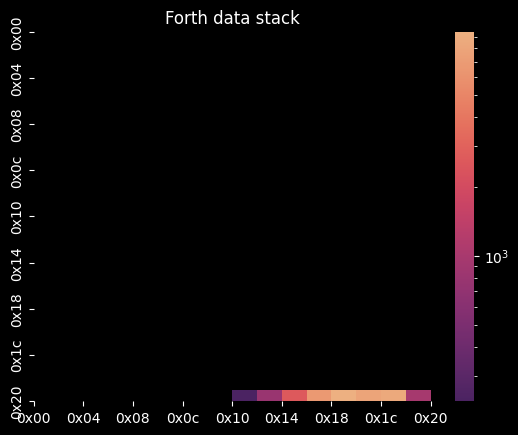

In [171]:
a = np.array(hits[0x600:0xa00]).reshape((32,32))
sns.heatmap(a, cmap='flare_r', norm=LogNorm())
hexaxes(4)
plt.title('Forth data stack')

Text(0.5, 1.0, 'Forth heap')

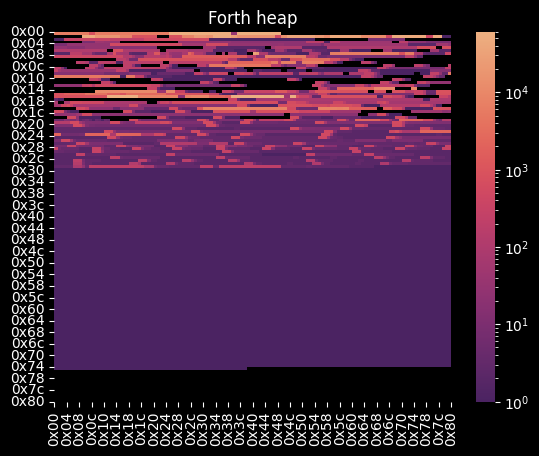

In [173]:
a = np.array(hits[0xa00:0x4a00]).reshape((128, 128))
sns.heatmap(a, cmap='flare_r', norm=LogNorm())
hexaxes(4)
plt.title('Forth heap')

Text(0.5, 1.0, '$fxxx')

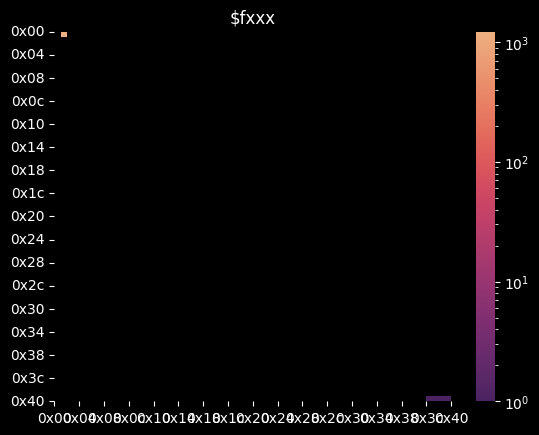

In [166]:
a = np.array(hits[0xf000:]).reshape((64, 64))
sns.heatmap(a, cmap='flare_r', norm=LogNorm())
hexaxes(4)
plt.title('$fxxx')

In [199]:
rows = [line.split()[1:] for line in open('forth.mon').readlines() if line.startswith('al')]
symtab = []
symbols = {}
for (off, name) in rows:
    off = int(off, 16)
    symbols[name] = off
    symtab.append((hits[off], off, name))

symtab[:3]

[(290753, 0, 'PC'),
 (290753, 0, '__MAIN_FILEOFFS__'),
 (290753, 0, '__STACK_FILEOFFS__')]

In [187]:
sorted([t for t in symtab if t[1] >= 0xa00], reverse=True)[:20]

[(60288, 5393, 'nxt'),
 (59507, 5433, 'differ'),
 (54023, 2630, 'nextword'),
 (54023, 2597, '_NEXT'),
 (48798, 2777, 'toreg'),
 (48171, 2797, 'done'),
 (48171, 2739, '_syncstack'),
 (47775, 2697, 'nextp'),
 (36558, 2763, 'tostk'),
 (33139, 3520, '_IN_value'),
 (22035, 2733, 'syncstack1'),
 (18684, 2705, 'next1'),
 (18541, 2701, 'next0'),
 (16292, 2737, 'syncstack0'),
 (11864, 2787, 'shrnk'),
 (11864, 2775, 'morepop'),
 (11046, 5133, 'nxtbuf'),
 (11046, 5095, 'key_'),
 (11046, 5095, '_key'),
 (10071, 5420, 'loop')]

In [189]:
# unused

[t for t in symtab if t[0] == 0]

[(0, 2633, 'tgtword'),
 (0, 2662, 'callword'),
 (0, 2721, 'syncstack4'),
 (0, 2900, '_hashxrl3'),
 (0, 2900, 'hashxrl3'),
 (0, 2902, 'loop'),
 (0, 2916, 'done'),
 (0, 3233, 'invalid'),
 (0, 3238, 'notlast'),
 (0, 3430, '_F_IMMED'),
 (0, 3432, '_F_IMMED_value'),
 (0, 3445, '_F_HIDDEN'),
 (0, 3447, '_F_HIDDEN_value'),
 (0, 3508, 'BASE'),
 (0, 3518, '_IN'),
 (0, 3703, 'ROT'),
 (0, 3812, '_2SWAP'),
 (0, 3933, 'ZNEQU'),
 (0, 3944, 'ZLT'),
 (0, 3948, '_cmp0'),
 (0, 3959, 'not0'),
 (0, 3966, 'chksgn'),
 (0, 3969, 'ispos'),
 (0, 3984, 'ZGT'),
 (0, 3996, 'ZLE'),
 (0, 4008, 'ZGE'),
 (0, 4053, 'LT'),
 (0, 4057, '_cmp'),
 (0, 4078, 'GT'),
 (0, 4089, 'LE'),
 (0, 4100, 'GE'),
 (0, 4157, 'XOR'),
 (0, 4586, 'DSPFETCH'),
 (0, 4606, 'DSPSTORE'),
 (0, 4626, 'RSPFETCH'),
 (0, 4667, 'RDROP'),
 (0, 4688, 'TORS'),
 (0, 4723, '_2TORS'),
 (0, 4756, 'FROMRS'),
 (0, 4789, '_2FROMRS'),
 (0, 4793, '_2FROMRS_'),
 (0, 4817, 'skip'),
 (0, 4825, 'DUPRS'),
 (0, 4847, '_2DUPRS'),
 (0, 4926, 'SUBSTORE'),
 (0, 4985, 'CMOV

In [181]:
sorted([s for s in symtab if s[2].endswith('_header')])

[(50, 3376, 'VERSION_header'),
 (51, 3390, 'S0_header'),
 (54, 3399, 'R0_header'),
 (55, 3408, '_DOCOL_header'),
 (57, 3420, '_F_IMMED_header'),
 (57, 3434, '_F_HIDDEN_header'),
 (57, 3449, '_F_LENMASK_header'),
 (58, 3465, 'STATE_header'),
 (61, 3477, 'LATEST_header'),
 (62, 3490, 'HERE_header'),
 (92, 3501, 'BASE_header'),
 (94, 3512, '_IN_header'),
 (94, 3522, 'SOURCE_ID_header'),
 (98, 3538, 'EXIT_header'),
 (99, 3572, 'EXECUTE_header'),
 (100, 3606, 'DROP_header'),
 (115, 3618, 'SWAP_header'),
 (141, 3646, 'DUP_header'),
 (161, 3665, 'OVER_header'),
 (165, 3697, 'ROT_header'),
 (167, 3732, 'NROT_header'),
 (172, 3768, '_2DROP_header'),
 (174, 3781, '_2DUP_header'),
 (178, 3804, '_2SWAP_header'),
 (178, 3847, 'QDUP_header'),
 (179, 3891, 'ZEQU_header'),
 (181, 3927, 'ZNEQU_header'),
 (181, 3939, 'ZLT_header'),
 (181, 3979, 'ZGT_header'),
 (182, 3990, 'ZLE_header'),
 (182, 4002, 'ZGE_header'),
 (182, 4014, 'EQU_header'),
 (185, 4038, 'NEQU_header'),
 (189, 4049, 'LT_header'),
 (190,

In [194]:
[t for t in symtab if t[2].startswith('FIND')]

[(346, 5364, 'FIND_header'), (830, 5371, 'FIND')]

In [202]:
data = open('forth-writes.dat', 'rb').read()
from struct import unpack
writes = unpack('65536I', data)
sorted(enumerate(writes), key=lambda xy: -xy[1])[:10]

[(20, 103111),
 (22, 95946),
 (6, 93391),
 (7, 91386),
 (24, 85341),
 (0, 81299),
 (25, 71997),
 (507, 68326),
 (21, 55336),
 (2, 27108)]

In [200]:
symbols['DOCOL'], symbols['bootstrap']

(2560, 6424)

In [206]:
for i in range(symbols['DOCOL'], symbols['bootstrap']):
    if writes[i]: print(f"{i:04x}", writes[i])

0d93 132
0da0 83
0da1 83
0dab 766
0dac 98
0dc0 11047
0dc1 44
0dd0 1
0dd1 1
1432 1
1433 1


In [214]:
for v in 'DOCOL STATE LATEST HERE _IN SOURCE_ID REFILL bootstrap'.split():
    if v+'_value' in symbols:
        v += '_value'
    print(v, "{:04x}".format(symbols[v]))

DOCOL 0a00
STATE_value 0d93
LATEST_value 0da0
HERE_value 0dab
_IN_value 0dc0
SOURCE_ID_value 0dd0
REFILL 1430
bootstrap 1918


In [204]:
symbols['HERE_value']

3499